# CA4

Group 37

Group members: 
* Jannicke Ådalen
* Marcus Dalaker Figenschou
* Rikke Sellevold Vegstein

In [1]:
# Standard library imports
import os

import matplotlib.pyplot as plt

# Common aliases
import numpy as np
import pandas as pd
import seaborn as sns

# Scikit-learn with specific imports
from sklearn import (
    decomposition as decomp,
)
from sklearn import (
    ensemble as ens,
)
from sklearn import (
    linear_model as lm,
)
from sklearn import (
    metrics as met,
)
from sklearn import (
    model_selection as msel,
)
from sklearn import (
    pipeline as pipe,
)
from sklearn import (
    preprocessing as prep,
)
from sklearn import (
    svm as svm,
)

In [2]:
# Setting the styles of plots so that they have same styling throughout
sns.set_style("white")
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

# Set working directory
if "CA4" in os.getcwd():
    os.chdir("..")  # Go up one level if we're in CA3

print(f"Working directory now: {os.getcwd()}")

# Load data
train_path = os.path.join("CA4", "assets", "train.csv")
test_path = os.path.join("CA4", "assets", "test.csv")

# Load data
# 1. Load data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

Working directory now: /Users/marcusdalakerfigenschou/Documents/NMBU/DAT200


# Data inspection and cleaning

In [3]:
print("---TRAIN DATA---")
train_df.info()
print("---TEST DATA---")
test_df.info()

---TRAIN DATA---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       80000 non-null  float64
 1   alpha        80000 non-null  float64
 2   delta        80000 non-null  float64
 3   u            79638 non-null  float64
 4   g            80000 non-null  float64
 5   r            80000 non-null  float64
 6   i            80000 non-null  float64
 7   z            80000 non-null  float64
 8   run_ID       80000 non-null  int64  
 9   rerun_ID     80000 non-null  int64  
 10  cam_col      80000 non-null  int64  
 11  field_ID     80000 non-null  int64  
 12  spec_obj_ID  80000 non-null  float64
 13  class        80000 non-null  object 
 14  redshift     80000 non-null  float64
 15  plate        80000 non-null  int64  
 16  MJD          80000 non-null  int64  
 17  fiber_ID     80000 non-null  int64  
dtypes: float64(10), int64(7), obj

## Metadata
A lot of metadata in this dataset (data that isnt physical properties) that is just used to organize the data for the future by astronomers. Seems also that u might be missing values since it has fewer entries and shows up as non-null, will investigate after metadata removal.

In [4]:
features = ["u", "g", "r", "i", "z", "redshift", "class"]
# Keeping everything except metadata columns
train_df = train_df[features]
print(train_df.head())

# Modifying test_data
test_df = test_df[features[:-1]]
print(test_df.head())

          u         g         r         i         z  redshift   class
0  23.87882  22.27530  20.39501  19.16573  18.79371  0.634794  GALAXY
1  24.77759  22.83188  22.58444  21.16812  21.61427  0.779136  GALAXY
2  25.26307  22.66389  20.60976  19.34857  18.94827  0.644195  GALAXY
3  22.13682  23.77656  21.61162  20.50454  19.25010  0.932346  GALAXY
4  19.43718  17.58028  16.49747  15.97711  15.54461  0.116123  GALAXY
          u         g         r         i         z  redshift
0  23.33542  21.95143  20.48149  19.60300  19.13094  0.506237
1  17.86033  16.79228  16.43001  16.30923  16.25873  0.000345
2  18.18911  16.89469  16.42161  16.24627  16.18549  0.000004
3  24.99961  21.71203  21.47148  21.30532  21.29109 -0.000291
4  23.76648  21.79737  20.69543  20.23403  19.97464 -0.000136


In [5]:
print("--- Train Data ---")
print(train_df.describe())

print("--- Test Data ---")
print(test_df.describe())

--- Train Data ---
                  u             g             r             i             z  \
count  79638.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      21.961115     20.507677     19.647426     19.085051     18.644640   
std       35.581856     35.483302      1.855636      1.757630     35.462189   
min    -9999.000000  -9999.000000      9.822070      9.469903  -9999.000000   
25%       20.353990     18.963188     18.135523     17.732600     17.457503   
50%       22.187965     21.101015     20.127550     19.405635     19.004420   
75%       23.698457     22.125007     21.047242     20.401857     19.923013   
max       32.781390     31.602240     29.571860     32.141470     29.383740   

           redshift  
count  80000.000000  
mean       0.577219  
std        0.731597  
min       -0.009971  
25%        0.055160  
50%        0.425051  
75%        0.704777  
max        7.011245  
--- Test Data ---
                  u             g             r      

Two things to see here. From the .info we can see that there are fewer observations of u than the rest and we have a min value -9999 for u, g and z which only shows up in train data but not in test data. But in our original data inspection we found no missing values, so this might indicate placeholder.

In [6]:
print(train_df.isnull().sum())

u           362
g             0
r             0
i             0
z             0
redshift      0
class         0
dtype: int64



We can now see that u is actually missing 362 values. Because of our datasize of 80k, we can comfortably remove 362 samples from our dataset of 80k.

In [7]:
train_df = train_df.dropna()

print(train_df.isnull().sum())

u           0
g           0
r           0
i           0
z           0
redshift    0
class       0
dtype: int64


In [8]:
print("--- Train Data ---")
train_df.info()

print(train_df.describe())

--- Train Data ---
<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, 0 to 79999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   u         79638 non-null  float64
 1   g         79638 non-null  float64
 2   r         79638 non-null  float64
 3   i         79638 non-null  float64
 4   z         79638 non-null  float64
 5   redshift  79638 non-null  float64
 6   class     79638 non-null  object 
dtypes: float64(6), object(1)
memory usage: 4.9+ MB
                  u             g             r             i             z  \
count  79638.000000  79638.000000  79638.000000  79638.000000  79638.000000   
mean      21.961115     20.505877     19.642925     19.078913     18.637218   
std       35.581856     35.563760      1.857044      1.757627     35.542443   
min    -9999.000000  -9999.000000      9.822070      9.469903  -9999.000000   
25%       20.353990     18.955027     18.124440     17.722930     17.446075   
5

There are still values with -9999, will investigate this further. This might be placeholder values, lets check.

In [9]:
negative_counts = (train_df.drop(columns=["class"]) == -9999).sum()
print("Negative value counts:")
print(negative_counts)

Negative value counts:
u           1
g           1
r           0
i           0
z           1
redshift    0
dtype: int64


Yes there is exactly one value with -9999 in the u, g and z columns. Will remove these

In [10]:
train_df = train_df.replace(-9999, np.nan)

train_df = train_df.dropna()

print(train_df.isnull().sum())

u           0
g           0
r           0
i           0
z           0
redshift    0
class       0
dtype: int64


In [11]:
print(train_df.describe())

                  u             g             r             i             z  \
count  79637.000000  79637.000000  79637.000000  79637.000000  79637.000000   
mean      22.086948     20.631692     19.642943     19.078927     18.763010   
std        2.255062      2.040605      1.857049      1.757634      1.765909   
min       12.101680     10.498200      9.822070      9.469903      9.612333   
25%       20.354020     18.955050     18.124410     17.722860     17.446180   
50%       22.187970     21.101020     20.122150     19.398670     18.998880   
75%       23.698460     22.128440     21.045090     20.393230     19.915550   
max       32.781390     31.602240     29.571860     32.141470     29.383740   

           redshift  
count  79637.000000  
mean       0.572216  
std        0.727200  
min       -0.009971  
25%        0.053708  
50%        0.421203  
75%        0.698300  
max        7.011245  


In [12]:
print(
    train_df["class"].value_counts(normalize=True).mul(100).round(2).astype(str) + " %"
)

class
GALAXY    59.75 %
STAR      21.66 %
QSO       18.59 %
Name: proportion, dtype: object


The class distribution is heavily skewed towards galaxies. Roghly 60 % of the dataset are galaxies. We can balance this out by downsampling galaxies, we will do this later just before we split our data into test/val.

# Data plotting

Before we go forward with plotting we will map galaxy, quasars and stars to their given values for submission. We will keep the original labels since this is more descriptive when we plot the data

In [13]:
class_mapping = {"GALAXY": 0, "QSO": 1, "STAR": 2}
# Keep original text labels for plotting
train_df["class_labels"] = train_df["class"]
# Replaceing with numeric codes
train_df["class"] = train_df["class"].map(class_mapping)

Since there is ~ 79k samples in our dataset we choose to extract a random sample of 5000. This is statistically enought to visualize the data distribution without needing to visualize ~ 79k samples which for some plots takes a lot of time.

In [14]:
features = train_df.columns.drop(["class", "class_labels"])
classes = train_df["class_labels"].unique()

sample_size = 5000
plot_df = train_df.columns.drop(["class"])
plot_df_sample = train_df.sample(n=sample_size, random_state=42)

## Boxplot

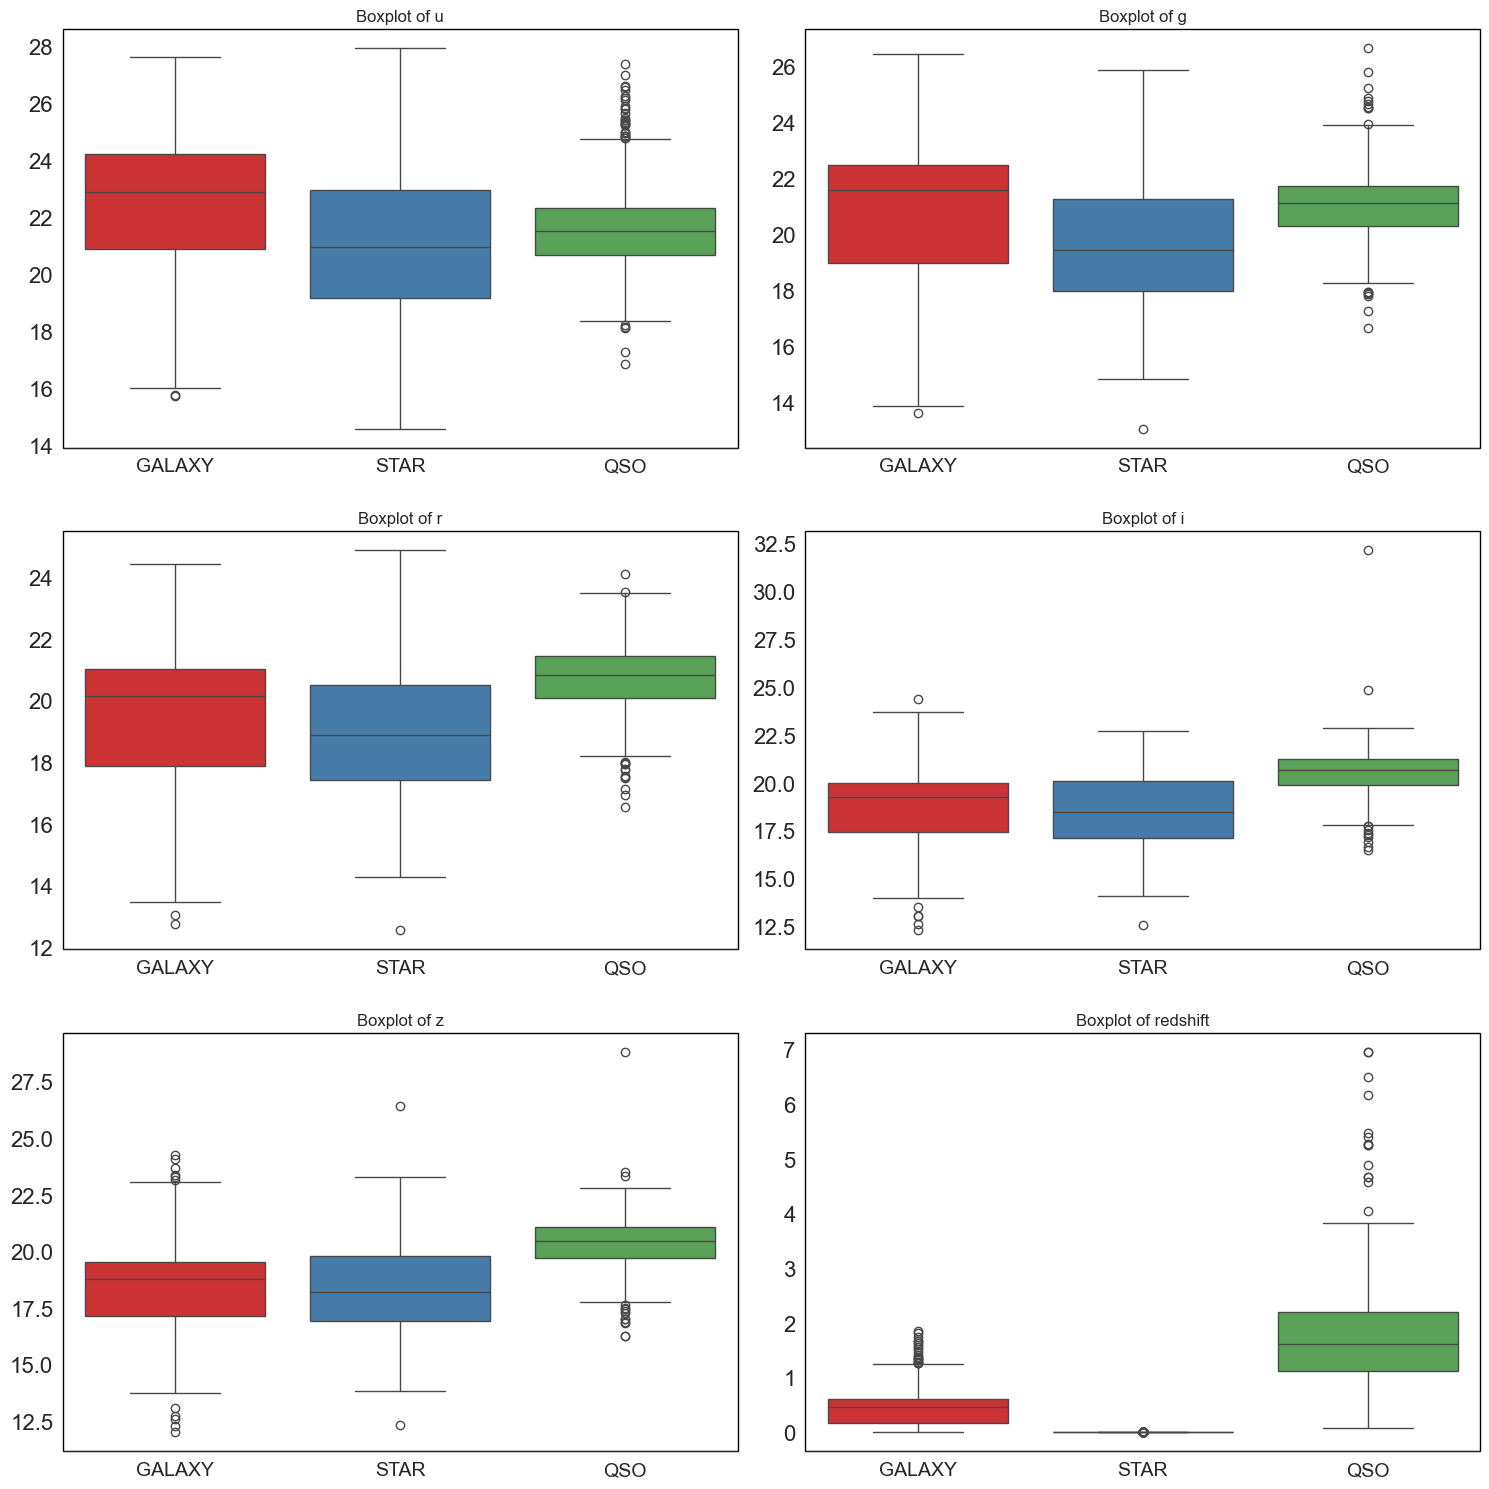

In [15]:
# %% EDA - Boxplot of raw data by feature

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(
        x="class_labels",
        y=feature,
        data=plot_df_sample,
        hue="class_labels",
        palette="Set1",
        ax=axes[i],
    )
    axes[i].set_title(f"Boxplot of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    axes[i].tick_params(axis="x", labelsize=14)
    axes[i].patch.set_edgecolor("black")
    axes[i].patch.set_linewidth(1)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.2)
plt.savefig("boxplot")
plt.show()


Based on the boxplot quasars has the most outliers.

## Violinplot

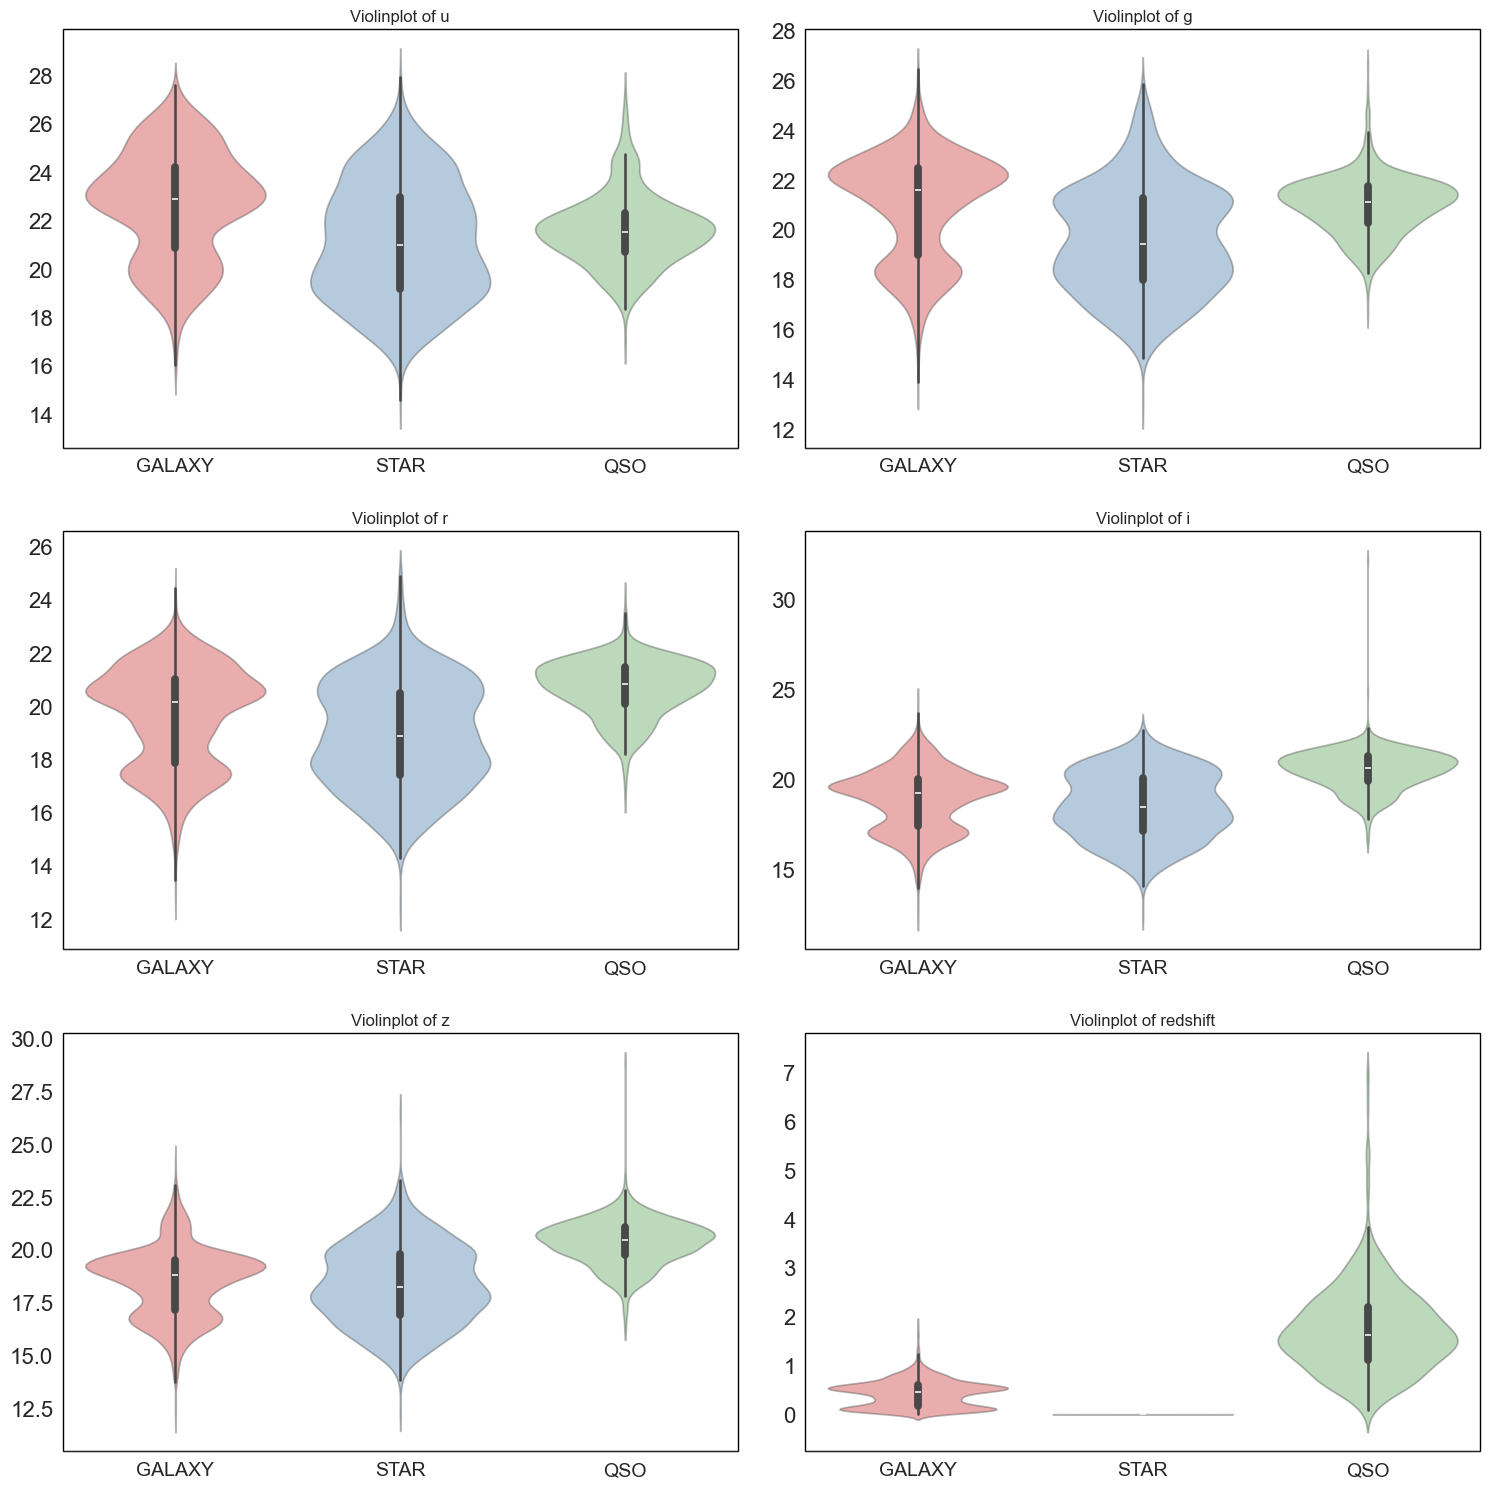

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.violinplot(
        data=plot_df_sample,
        x="class_labels",
        y=feature,
        hue="class_labels",
        palette="Set1",
        ax=axes[i],
        alpha=0.4,
        orient="v",
    )
    axes[i].set_title(f"Violinplot of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis="x", labelsize=14)
    axes[i].patch.set_edgecolor("black")
    axes[i].patch.set_linewidth(1)
# Adjust layout
plt.tight_layout()
fig.subplots_adjust(hspace=0.2)
plt.show()

The violinplot shows that galaxy is biomodal for all features. Star is somewhat biomodal for features: g, r and i. Quasars is only unimodal.

It is interesting that galaxies are biomodal for all features, this might be due to galaxies come in different sizes and shapes, and also have varying degrees of luminosity.

That some features show stars as biomodal is also to be expected as stars vary in size and shape, but we did believe that this effect should be stronger than it is .

The quasars are unimodal for all features.

## Feature Correlation Matrix

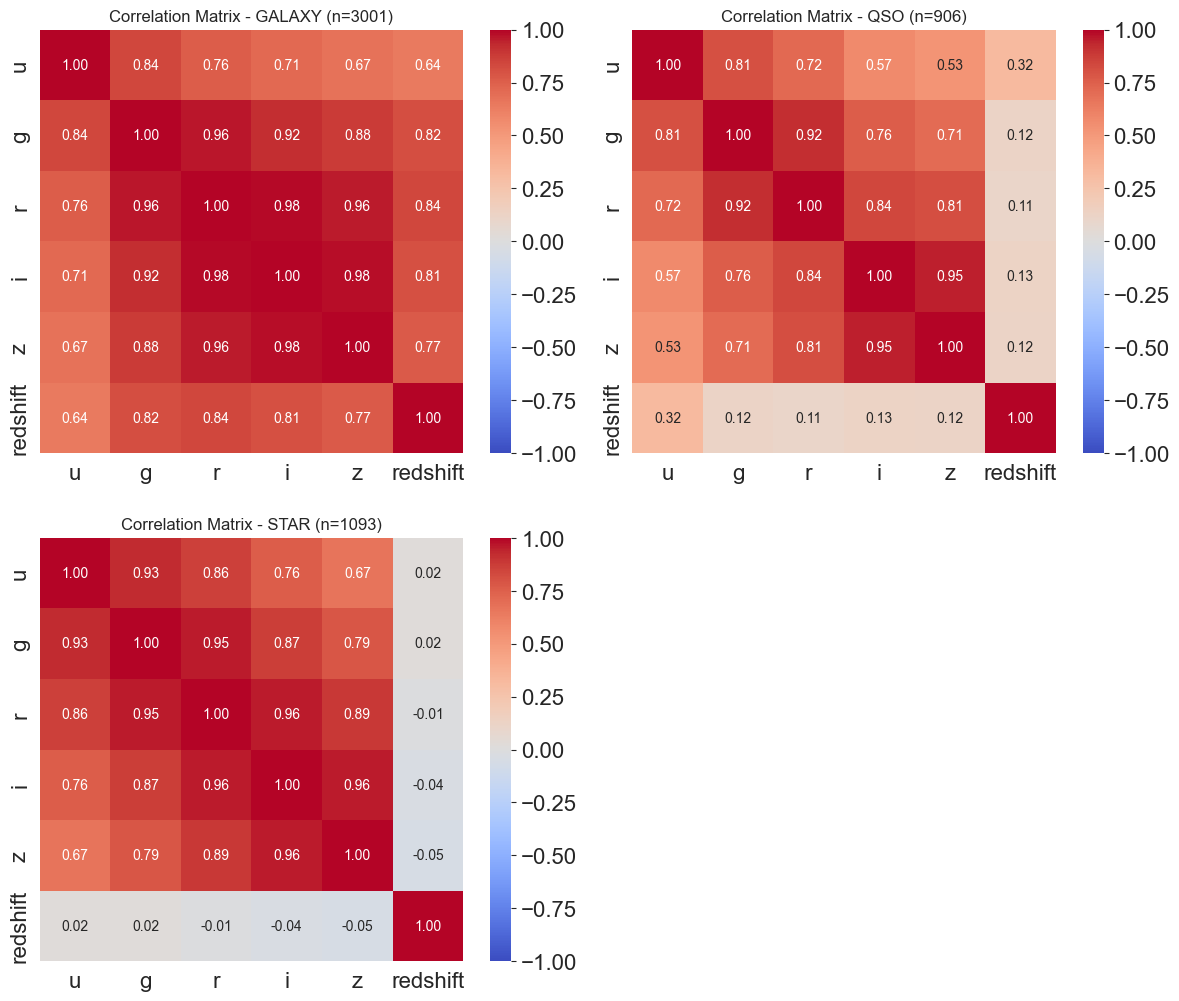

In [17]:
samples = [
    plot_df_sample[plot_df_sample["class_labels"] == cls][features] for cls in classes
]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot correlation matrix for each class
for i, (df, title) in enumerate(zip(samples, classes)):
    correlation_matrix = df.corr()
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        ax=axes[i],
        square=True,
        vmin=-1.0,
        vmax=1.0,
    )
    axes[i].set_title(f"Correlation Matrix - {title} (n={len(df)})")
fig.delaxes(axes[3])
plt.tight_layout()
plt.xticks(rotation=90)
fig.subplots_adjust(hspace=0.2)
plt.show()

From the correlation matrix we can see that redshift will be our most important feature when it comes to seperating the three categories.

# Creating New Features

Now that we have a balanced dataset, we can create new features based on color indices—a method astronomers use to assess the light intensity of celestial objects. We must also remember to add these features to our original training data and test data.

We can group the filters based on thier photometric system like this:

Visible light:
- g(green filter)
- r(red filter)

Ultraviolet light:
- u(ultraviolet)

Infrared spectrum:
- i(near infrared)
- z(infrared)

In [18]:
# creating a definition we can use later to create new feature datasets
def feature_engineering(df):
    """Adding astronomical color indices to the dataframe."""
    df_features = df.copy()

    df_features["r-z"] = df_features["r"] - df_features["z"]
    df_features["g-r"] = df_features["g"] - df_features["r"]
    df_features["u-r"] = df_features["u"] - df_features["r"]
    df_features["i-z"] = df_features["i"] - df_features["z"]
    df_features["i-r"] = df_features["i"] - df_features["r"]
    df_features["u-g"] = df_features["u"] - df_features["g"]
    df_features["g-i"] = df_features["g"] - df_features["i"]

    # redshift is the feature that seems to seperate the classes best so we will create some more

    df_features["redshift_squared"] = df_features["redshift"] ** 2
    df_features["log_redshift"] = np.log1p(df_features["redshift"])

    # Simple multiplication interactions
    df_features["redshift_u"] = df_features["redshift"] * df_features["u"]

    # We try to create a brightness feature here to
    df_features["spectral_contrast"] = df_features[["u-g", "g-r", "i-r", "i-z"]].max(
        axis=1
    ) - df_features[["u-g", "g-r", "i-r", "i-z"]].min(axis=1)

    return df_features

In [19]:
train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)

We ran first a random forest model with all the features above and then we plotted the cumuluative feature importances and chose to keep the features that had ~95% relevance for our model, these are the features we we ended up with.

In [20]:
top_features = [
    "redshift_squared",
    "log_redshift",
    "redshift",
    "redshift_u",
    "g-i",
    "g-r",
    "spectral_contrast",
    "i-r",
    "r-z",
    "u-r",
    "g",
    "class",
    "class_labels",
]

In [21]:
train_df_rf = train_df[top_features]
print(train_df_rf)

test_df_rf = test_df[top_features[:-2]]
print(test_df_rf.info())

       redshift_squared  log_redshift  redshift  redshift_u      g-i      g-r  \
0              0.402963      0.491517  0.634794   15.158122  3.10957  1.88029   
1              0.607053      0.576128  0.779136   19.305112  1.66376  0.24744   
2              0.414987      0.497251  0.644195   16.274331  3.31532  2.05413   
3              0.869268      0.658735  0.932346   20.639167  3.27202  2.16494   
4              0.013484      0.109861  0.116123    2.257098  1.60317  1.08281   
...                 ...           ...       ...         ...      ...      ...   
79995          0.030697      0.161444  0.175206    3.673241  0.66914  0.47439   
79996          0.000000      0.000000  0.000000    0.000000  1.67038  1.07182   
79997          0.163940      0.339963  0.404895    9.187545  2.62869  1.93625   
79998          0.020554      0.133976  0.143366    3.034929  1.57963  1.06569   
79999          0.207061      0.375033  0.455040   11.535431  2.56503  1.72371   

       spectral_contrast   

# Training the models
Since we are working with three categorical target values and a large dataset we have chosen to go for the following models:
- Random Forest Classifier
- Logistic Regression model
- SVC

In [22]:
X = train_df.drop(columns=["class", "class_labels"])
y = train_df["class"]

# Splitting the data into train and test data with a 60/40 split
X_train, X_test, y_train, y_test = msel.train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

print(X_train)

              u         g         r         i         z  redshift      r-z  \
51250  23.16140  19.78813  18.14963  17.58067  17.21574  0.287303  0.93389   
20920  22.78057  21.38032  20.12449  19.37685  18.90473  0.541733  1.21976   
11541  20.94544  19.03593  17.94981  17.43122  17.08923  0.173263  0.86058   
65268  23.38434  22.57579  20.77931  19.82982  19.43713  0.483335  1.34218   
45314  24.56469  22.25128  20.64855  19.69905  19.12333  0.499642  1.52522   
...         ...       ...       ...       ...       ...       ...      ...   
6386   19.83227  18.22170  17.60873  17.23337  17.03842  0.048716  0.57031   
50384  22.17013  22.04525  20.65752  19.82702  19.46426  0.459022  1.19326   
64278  22.46783  21.84509  20.35958  19.14750  18.68771  0.605329  1.67187   
71200  20.11584  19.86811  19.80854  19.56936  19.51936  1.625502  0.28918   
40816  21.70328  19.35196  17.79519  17.23244  16.84140  0.247205  0.95379   

           g-r      u-r      i-z      i-r      u-g      g-i  re

## Random Forest Classifier

Random forest is especially good for unbalanced data and multi category classification problems.

In [ ]:
random_forest = ens.RandomForestClassifier(n_jobs=-1, random_state=42)

rf_pipe = pipe.Pipeline([("random_forest", random_forest)])


# Parameter distributions for random search
param_grid_rf = {
    "random_forest__n_estimators": [100, 200, 300, 400, 500],
    "random_forest__max_depth": [5, 10, 15, 20, 25, None],
    "random_forest__min_samples_split": [2, 5, 10, 15, 20],
    "random_forest__max_features": ["sqrt", "log2"],
    "random_forest__criterion": ["gini", "entropy", "log_loss"],
}

# Since data is unbalanced we will use stratifiedkfold
stratified_cv = msel.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# We will use randomizedsearchCV since we are doing hyperparamter tuning
rf_search = msel.RandomizedSearchCV(
    rf_pipe,
    param_distributions=param_grid_rf,
    n_iter=100,
    # Using StratifiedKFold
    cv=stratified_cv,
    n_jobs=-1,
    scoring="f1_macro",
    return_train_score=True,
)

rf_search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % rf_search.best_score_)
print(rf_search.best_params_)


# Print best results
print("Best parameter (CV score=%0.3f):" % rf_search.best_score_)
print(rf_search.best_params_)

In [ ]:
# Evaluate on test set
best_rf_model = rf_search.best_estimator_
y_test_pred_rf = best_rf_model.score(X_test, y_test)
print(f"Test set score with best model: {y_test_pred_rf:.3f}")
print(best_rf_model)

In [ ]:
# Get predictions on the sample test set
y_pred_rf = best_rf_model.predict(X_test)

# Print classification report
print("Classification Report on Sample Test Set:")
print(met.classification_report(y_test, y_pred_rf))

# Create confusion matrix
print("Confusion Matrix on Sample Test Set:")
conf_matrix = met.confusion_matrix(y_test, y_pred_rf)
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=best_rf_model.classes_,
    yticklabels=best_rf_model.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Sample Test Set)")
plt.tight_layout()
plt.show()

In [ ]:
# Extract best parameters from the best model
best_n_estimators = rf_search.best_params_["random_forest__n_estimators"]
best_max_depth = rf_search.best_params_["random_forest__max_depth"]
best_min_samples_split = rf_search.best_params_["random_forest__min_samples_split"]
best_max_features = rf_search.best_params_["random_forest__max_features"]
best_criterion = rf_search.best_params_["random_forest__criterion"]

In [ ]:
print("Training final model on the entire dataset...")

# Prepare full data
X_full = train_df.drop(columns=["class_labels", "class"])
y_full = train_df["class"]


final_rf = ens.RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_features=best_max_features,
    max_depth=best_max_depth,
    criterion=best_criterion,
    random_state=42,
    n_jobs=-1,  # Use all available cores
)


# Create the final pipeline with scaling
final_rf_pipeline = pipe.Pipeline([("random_forest", final_rf)])

# Train the pipeline on unscaled data - pipeline handles scaling internally
final_rf_pipeline.fit(X_full, y_full)

print(f"Final rf model trained on {len(X_full)} samples")

### Prediction

In [ ]:
y_test_rf = final_rf_pipeline.predict(test_df)

# Create the final dataframe with numeric class predictions
y_test_rf = pd.DataFrame(y_test_rf, columns=["class"])
y_test_rf.index.name = "ID"

# Add file path with appropriate naming related to model parameters
base_dir = os.path.join("CA4", "results")
os.makedirs(base_dir, exist_ok=True)
filename = "random_forest_model.csv"
file_path = os.path.join(base_dir, filename)

# Save to CSV
y_test_rf[["class"]].to_csv(file_path)
print(f"Saved rf submission to {file_path}")

## Logistic Regression model without PCA

In [ ]:
# %% Pipeline setup for logreg without

logreg = lm.LogisticRegression(n_jobs=-1, random_state=42)
std_scaler = prep.StandardScaler()

logreg_pipe = pipe.Pipeline([("scaler", std_scaler), ("logreg", logreg)])

param_grid_logreg = {
    "logreg__max_iter": [50, 100, 200, 300],
    "logreg__penalty": ["l2"],
    "logreg__solver": ["sag", "saga", "newton-cg"],
    "logreg__C": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
}


# Since data is unbalanced we will use stratifiedkfold
stratified_cv = msel.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

logreg_search = msel.RandomizedSearchCV(
    logreg_pipe,
    param_distributions=param_grid_logreg,
    n_iter=100,
    # Using StratifiedKFold
    cv=stratified_cv,
    n_jobs=-1,
    scoring="f1_macro",
    return_train_score=True,
)

logreg_search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % logreg_search.best_score_)
print(logreg_search.best_params_)

In [ ]:
# Evaluate on test set
best_logreg = logreg_search.best_estimator_
y_test_pred = best_logreg.score(X_test, y_test)
print(f"Test set score with best model: {y_test_pred:.3f}")

In [ ]:
# Detailed evaluation on test set from sample
# First, evaluate the sample model performance more thoroughly

# Get predictions on the sample test set
y_pred_logreg = best_logreg.predict(X_test)

# Print classification report
print("Classification Report on Sample Test Set:")
print(met.classification_report(y_test, y_pred_logreg))

# Create confusion matrix
print("Confusion Matrix on Sample Test Set:")
conf_matrix = met.confusion_matrix(y_test, y_pred_logreg)
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=best_logreg.classes_,
    yticklabels=best_logreg.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Sample Test Set)")
plt.tight_layout()
plt.show()

In [ ]:
# Final model training on the entire training dataset
print("Training final model on the entire balanced dataset...")

# Prepare full data
X_full = train_df.drop(columns=["class_labels", "class"])
y_full = train_df["class"]

# %% Create a pipeline with the best parameters

final_logreg = lm.LogisticRegression(
    max_iter=logreg_search.best_params_["logreg__max_iter"],
    penalty=logreg_search.best_params_["logreg__penalty"],
    solver=logreg_search.best_params_["logreg__solver"],
    C=logreg_search.best_params_["logreg__C"],
    random_state=42,
    n_jobs=-1,  # Use all available cores
)

# Create the final pipeline with scaling
final_logreg_pipe = pipe.Pipeline([("scaler", std_scaler), ("logreg", final_logreg)])

# Train the pipeline on unscaled data - pipeline handles scaling internally
final_logreg_pipe.fit(X_full, y_full)
print(f"Final logistic model trained on {len(X_full)} samples")

In [ ]:
# Make predictions using the pipeline (no additional scaling needed)

# The pipeline handles scaling internally
y_test_logreg = final_logreg_pipe.predict(test_df)

# Create the final dataframe with numeric class predictions
y_test_logreg = pd.DataFrame(y_test_logreg, columns=["class"])
y_test_logreg.index.name = "ID"

# Add file path with appropriate naming related to model parameters
base_dir = os.path.join("CA4", "results")
os.makedirs(base_dir, exist_ok=True)
filename = "logreg_model.csv"
file_path = os.path.join(base_dir, filename)

# Save to CSV
y_test_logreg.to_csv(file_path)  # Keep the index as it's set to "ID"
print(f"Saved logistic submission to {file_path}")

## SVC Model With PCA

In [ ]:
svm_model = svm.SVC(random_state=42)
pca = decomp.PCA()
std_scaler = prep.StandardScaler()


pipe_svm = pipe.Pipeline([("scaler", std_scaler), ("pca", pca), ("svm", svm_model)])

param_grid_svm = {
    "pca__n_components": [0.95],  # Add this if you want to tune PCA
    "svm__kernel": ["rbf"],
    "svm__decision_function_shape": ["ovr", "ova"],
    "svm__C": [0.1, 1, 10],
    "svm__degree": [1, 2],
    "svm__gamma": ["scale", "auto", 0.01, 0.1],
}

# Since data is unbalanced we will use stratifiedkfold
stratified_cv = msel.StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
svc_search = msel.RandomizedSearchCV(
    pipe_svm,
    param_distributions=param_grid_svm,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    scoring="f1_macro",
    return_train_score=True,
)
svc_search.fit(X_train, y_train)

# Print best results - fix the variable name
print("Best parameter (CV score=%0.3f):" % svc_search.best_score_)
print(svc_search.best_params_)  # Not search.best_params_

In [ ]:
# %% Evaluate on test set
best_svc_model = svc_search.best_estimator_
y_test_pred = best_svc_model.score(X_test, y_test)
print(f"Test set score with best model: {y_test_pred:.3f}")


# %% Detailed evaluation on test set from sample
# First, evaluate the sample model performance more thoroughly

# Get predictions on the sample test set
y_pred_svc = best_svc_model.predict(X_test)

# Print classification report
print("Classification Report on Sample Test Set:")
print(met.classification_report(y_test, y_pred_svc))

# Create confusion matrix
print("Confusion Matrix on Sample Test Set:")
conf_matrix = met.confusion_matrix(y_test, y_pred_svc)
print(conf_matrix)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=best_svc_model.classes_,
    yticklabels=best_svc_model.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Sample Test Set)")
plt.tight_layout()
plt.show()

In [ ]:
# Final model training on the entire training dataset
print("Training final model on the entire balanced dataset...")
# Prepare full data
X_full = train_df.drop(columns=["class_labels", "class"])
y_full = train_df["class"]

final_svm = svm.SVC(
    kernel=svc_search.best_params_["svm__kernel"],
    C=svc_search.best_params_["svm__C"],
    degree=svc_search.best_params_["svm__degree"],
    gamma=svc_search.best_params_["svm__gamma"],
    random_state=42,
    # SVC doesn't support n_jobs parameter
)

# Create the final pipeline with scaling and PCA
final_svm_pipe = pipe.Pipeline(
    [("scaler", std_scaler), ("pca", pca), ("svm", final_svm)]
)

# Train the pipeline on unscaled data - pipeline handles scaling internally
final_svm_pipe.fit(X_full, y_full)
print(f"Final SVM model trained on {len(X_full)} samples")

In [ ]:
# Make predictions using the pipeline (no additional scaling needed)

# The pipeline handles scaling internally
y_test_svc = final_svm_pipe.predict(test_df)

# Create the final dataframe with numeric class predictions
y_test_svc = pd.DataFrame(y_test_svc, columns=["class"])
y_test_svc.index.name = "ID"

# Add file path with appropriate naming related to model parameters
base_dir = os.path.join("CA4", "results")
os.makedirs(base_dir, exist_ok=True)
filename = "svc_model.csv"
file_path = os.path.join(base_dir, filename)

# Save to CSV
y_test_svc.to_csv(file_path)  # Keep the index as it's set to "ID"
print(f"Saved svc submission to {file_path}")

Why we are getting all of these errors we do not know. We have tried to figure this out but we can't find a solution. From the confusion matrixes, all models handles star really good, this is mostlikely because redshift doesnt really apply to stars so its a really good feature for separation. All models struggle to seperate quasars from galaxies, this is most likely due to there beeing fewer quasars than galaxies in the dataset, and quasars do happen in the centre of galaxies. Overall our best model was the random forest model.

Kaggle public score:

rf: 0.976
logreg: 0.958
svc: 0.966